In [1]:
import tensorflow as tf
from tensorflow import keras

C:\Users\pc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print(tf.__version__)

1.10.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 9s 2us/step


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
train_labels.shape

(60000,)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
test_labels.shape

(10000,)

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

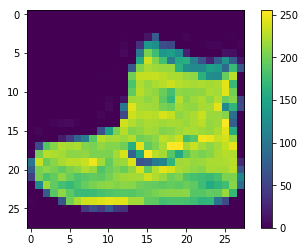

In [27]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255. Here's the function to preprocess the images:

It's important that the training set and the testing set are preprocessed in the same way:

In [33]:
train_images = train_images/255.0
test_images = test_images/255.0

Display the first 20 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

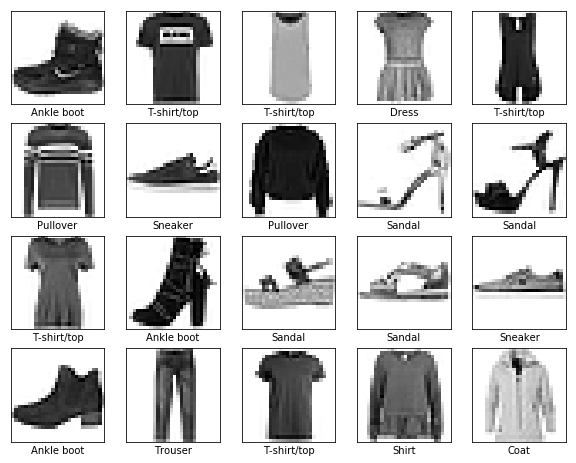

In [35]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

## Setup the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.


## Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

### Loss function 

—This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.

### Optimizer

—This is how the model is updated based on the data it sees and its loss function.

### Metrics

—Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [44]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

Feed the training data to the model—in this example, the train_images and train_labels arrays.

The model learns to associate images and labels.

We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—the model is "fit" to the training data:

In [45]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.4914 - acc: 0.8264
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.3690 - acc: 0.8673
Epoch 3/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.3337 - acc: 0.8784
Epoch 4/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.3139 - acc: 0.8839
Epoch 5/10
60000/60000 [==============================] - ETA: 0s - loss: 0.2949 - acc: 0.891 - 6s 97us/step - loss: 0.2953 - acc: 0.8914
Epoch 6/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.2802 - acc: 0.8977
Epoch 7/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.2671 - acc: 0.9008
Epoch 8/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.2572 - acc: 0.9044
Epoch 9/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.2479 - acc: 0.9083
Epoch 10/10
60000/60000 [==============================]

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.


## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [46]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test Accuracy : ',test_acc)

10000/10000 [==============================] - 1s 70us/step
Test Accuracy :  0.8838


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [47]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [48]:
predictions[0]

array([1.9982838e-06, 1.1880943e-09, 9.0606034e-10, 5.3612309e-10,
       3.7118835e-09, 1.7290011e-04, 1.2811897e-07, 3.3563960e-02,
       3.5915185e-08, 9.6626097e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [49]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct:

In [50]:
test_labels[0]

9

We can graph this to look at the full set of 10 channels



In [52]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

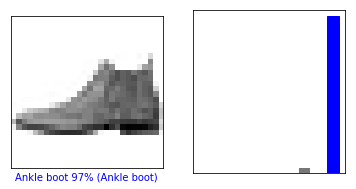

In [55]:
i =0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

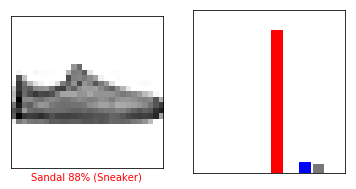

In [56]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

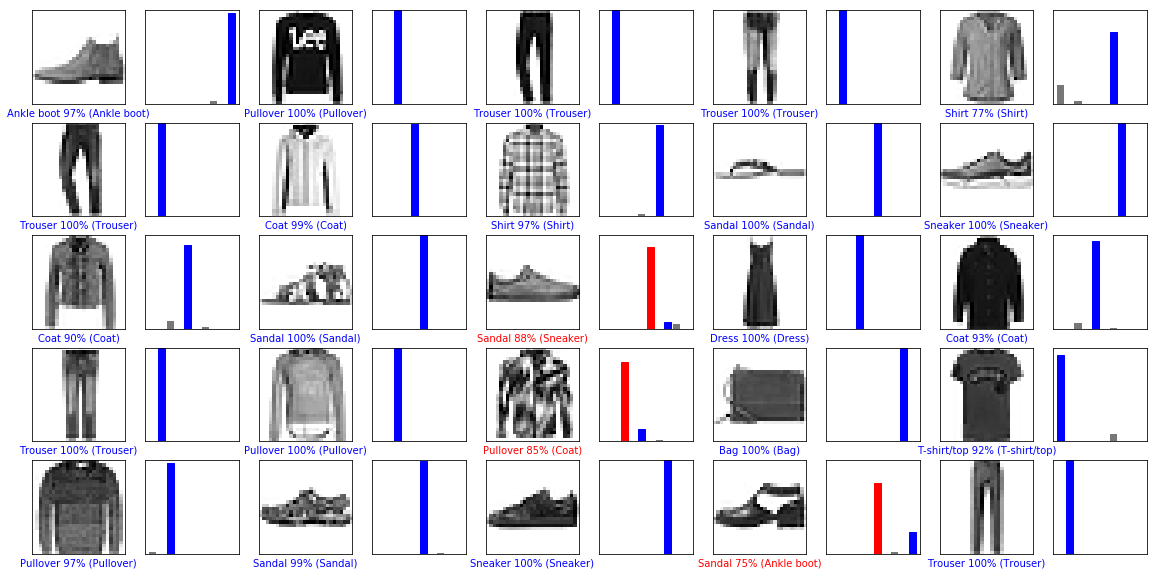

In [61]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

num_rows = 5
num_columns = 5
num_images = num_rows*num_columns

plt.figure(figsize=(2*2*num_columns,2*num_rows))

for i in range(num_images):
    
    plt.subplot(num_rows, 2*num_columns, 2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    
    plt.subplot(plt.subplot(num_rows, 2*num_columns, 2*i+2))
    plot_value_array(i,predictions,test_labels)

In [62]:
# Finally, use the trained model to make a prediction about a single image.

# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:



In [76]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [81]:
# Now predict the image:

predictions_single = model.predict(img)

print(predictions_single)

[[1.9982817e-06 1.1880943e-09 9.0606034e-10 5.3612309e-10 3.7118761e-09
  1.7289993e-04 1.2811886e-07 3.3563953e-02 3.5915185e-08 9.6626097e-01]]


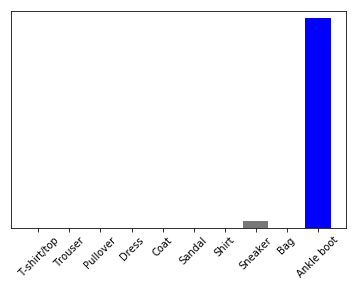

In [82]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [83]:
np.argmax(predictions_single[0])

9

And, as before, the model predicts a label of 9.